In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import pandas as pd
import numpy as np
import sys
import matplotlib.pyplot as plt

sys.path.append("helpers")
from helpers import LORIS_data_preparation

In [2]:
# LORIS saved query (all data)
full = pd.read_csv("../../diagnosis_predictor/data/raw/LORIS-release-10.csv", dtype=object)

In [3]:
df = LORIS_data_preparation.prepare_data(full)

/Users/home/Repos/hbn/HBN-scripts/exploration/helpers/LORIS_data_preparation.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full["ID"] = full_for_EID_check.iloc[:, 0]


In [4]:
age = "Basic_Demos,Age"
sex = "Basic_Demos,Sex"
spelling = "WIAT,WIAT_Spell_Stnd"

df[age] = np.floor(df[age].astype(float))

print(len(df[~(df[spelling].isnull())][spelling]))
print("6yo with WIAT: ", len(df[(df[age] == 6) & ~(df[spelling].isnull())][spelling]))
print("5yo with WIAT: ", len(df[(df[age] == 5) & ~(df[spelling].isnull())][spelling]))
print("5 and 6yo with WIAT: ", len(df[((df[age] == 5) | (df[age] == 6)) & ~(df[spelling].isnull())]))

all_wiat_cols = [x for x in df.columns if "WIAT" in x]
all_wisc_cols = [x for x in df.columns if "WISC" in x]
five_and_six_wiat = df[((df[age] == 5) | (df[age] == 6)) & ~(df[spelling].isnull())]
five_and_six_wiat[all_wiat_cols + all_wisc_cols + [age, sex]].to_csv("five_and_six_wiat.csv")

3682
6yo with WIAT:  386
5yo with WIAT:  249
5 and 6yo with WIAT:  635


In [15]:
skill_age_cols = [x for x in five_and_six_wiat.columns if "PreInt_DevHx,skill_age_" in x and not x.endswith(tuple(["12", "13", "14"]))]
skill_range_cols = [x for x in five_and_six_wiat.columns if "PreInt_DevHx,skill_range_" in x and not x.endswith(tuple(["12", "13", "14"]))]

dict_range_cols = {"PreInt_DevHx,skill_range_01": "Head up",
                        "PreInt_DevHx,skill_range_02": "Sat without help",
                        "PreInt_DevHx,skill_range_03": "Crawled",
                        "PreInt_DevHx,skill_range_04": "Stood",
                        "PreInt_DevHx,skill_range_05": "Cruised",
                        "PreInt_DevHx,skill_range_06": "Walked",
                        "PreInt_DevHx,skill_range_07": "Ran",
                        "PreInt_DevHx,skill_range_08": "Rode a trycicle",
                        "PreInt_DevHx,skill_range_09": "Tied shoes",
                        "PreInt_DevHx,skill_range_10": "Fed self",
                        "PreInt_DevHx,skill_range_11": "Dressed self",
                        "PreInt_DevHx,skill_range_15": "Spoke first word",
                        "PreInt_DevHx,skill_range_16": "Named objects",
                        "PreInt_DevHx,skill_range_17": "Put 2 or 3 words together"
                        }

for col in skill_range_cols:
    print(dict_range_cols[col], len(five_and_six_wiat[five_and_six_wiat[col].notna()]))

print("Has Parent learning problems filled:", len(five_and_six_wiat[five_and_six_wiat["PreInt_FamHx,f_learn"].notna()]))
print("Has Spoke first word age filled:", len(five_and_six_wiat[five_and_six_wiat["PreInt_DevHx,skill_age_15"].notna() | five_and_six_wiat["PreInt_DevHx,skill_range_15"].notna()]))
print("Has Named objects age filled:", len(five_and_six_wiat[five_and_six_wiat["PreInt_DevHx,skill_age_16"].notna() | five_and_six_wiat["PreInt_DevHx,skill_range_16"].notna()]))
print("Has Put 2 or 3 words together age filled:", len(five_and_six_wiat[five_and_six_wiat["PreInt_DevHx,skill_age_17"].notna() | five_and_six_wiat["PreInt_DevHx,skill_range_17"].notna()]))
print("Has Support filled:", len(five_and_six_wiat[five_and_six_wiat["PreInt_EduHx,CPSE"].notna() | five_and_six_wiat["PreInt_EduHx,EI"].notna()]))
print("Has Prematurity filled:", len(five_and_six_wiat[five_and_six_wiat["PreInt_DevHx,premature"].notna() | five_and_six_wiat["PreInt_DevHx,premature"].notna()]))


print("\nHas CBCL filled:", len(five_and_six_wiat[five_and_six_wiat["CBCL,EID"].notna()]))
print("Has CBCL-Pre filled:", len(five_and_six_wiat[five_and_six_wiat["CBCL_Pre,EID"].notna()]))

Head up 239
Sat without help 231
Crawled 208
Stood 221
Cruised 211
Walked 170
Ran 176
Rode a trycicle 196
Tied shoes 100
Fed self 250
Dressed self 242
Spoke first word 300
Named objects 315
Put 2 or 3 words together 320
Has Parent learning problems filled: 37
Has Spoke first word age filled: 562
Has Named objects age filled: 427
Has Put 2 or 3 words together age filled: 507
Has Support filled: 628
Has Prematurity filled: 552

Has CBCL filled: 487
Has CBCL-Pre filled: 147


                      PreInt_FamHx,f_learn  WIAT,WIAT_Spell_Stnd
PreInt_FamHx,f_learn              1.000000             -0.061014
WIAT,WIAT_Spell_Stnd             -0.061014              1.000000


/Users/home/Repos/hbn/HBN-scripts/exploration/helpers/LORIS_data_preparation.py:250: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = data[col].astype(str).replace(dict)
/var/folders/63/96f7chcx7qq5r9fq4x0x72bw0000gq/T/ipykernel_998/719631756.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  for_corr[col] = for_corr[col].astype(float)


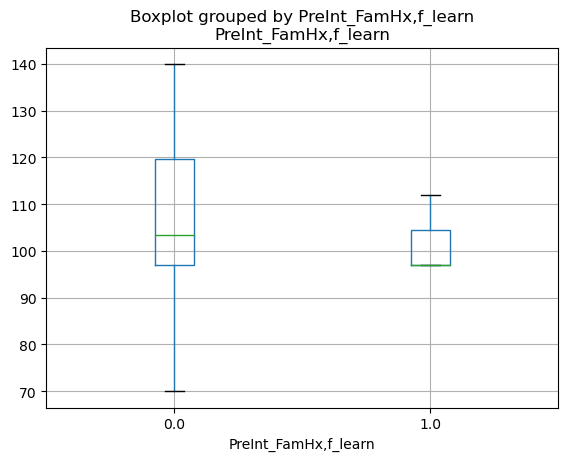

                      PreInt_EduHx,CPSE  WIAT,WIAT_Spell_Stnd
PreInt_EduHx,CPSE              1.000000             -0.107569
WIAT,WIAT_Spell_Stnd          -0.107569              1.000000


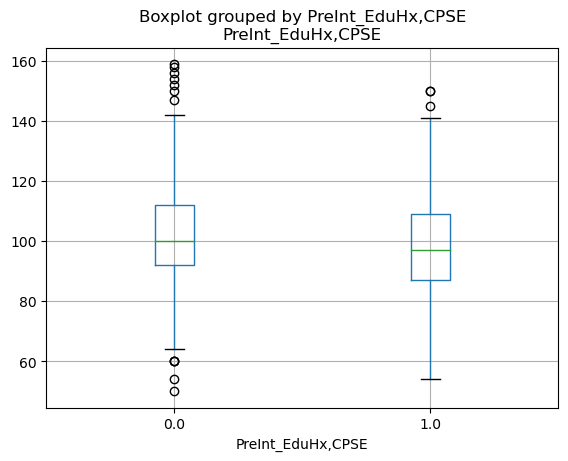

                      PreInt_EduHx,EI  WIAT,WIAT_Spell_Stnd
PreInt_EduHx,EI              1.000000             -0.114304
WIAT,WIAT_Spell_Stnd        -0.114304              1.000000


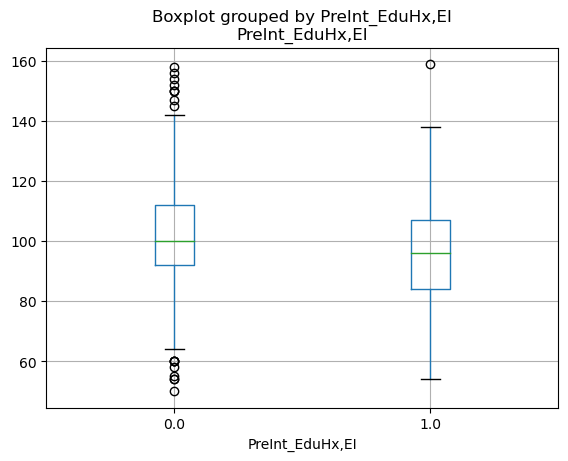

                        PreInt_DevHx,premature  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,premature                1.000000             -0.063694
WIAT,WIAT_Spell_Stnd                 -0.063694              1.000000


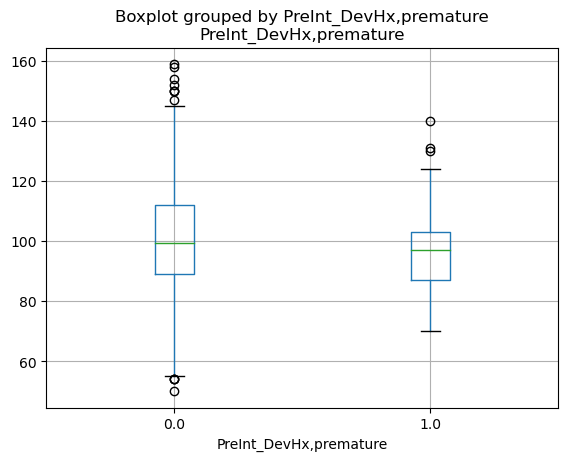

                      PreInt_Lang,NumLangs  WIAT,WIAT_Spell_Stnd
PreInt_Lang,NumLangs              1.000000              0.041409
WIAT,WIAT_Spell_Stnd              0.041409              1.000000


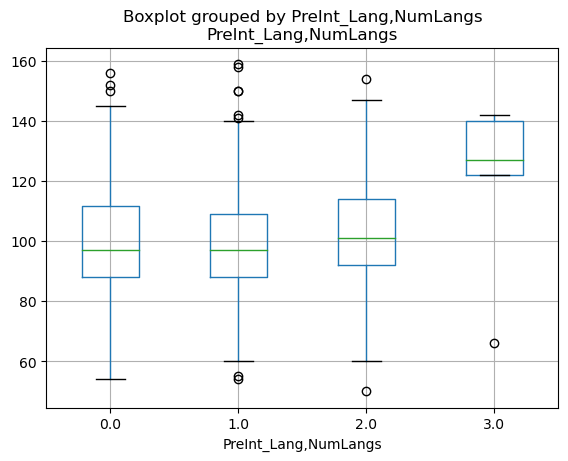

                             PreInt_DevHx,skill_range_01  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_01                     1.000000             -0.059838
WIAT,WIAT_Spell_Stnd                           -0.059838              1.000000


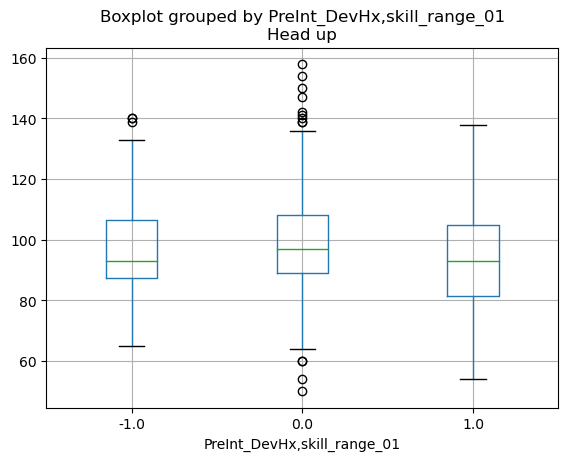

                             PreInt_DevHx,skill_range_02  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_02                     1.000000             -0.061718
WIAT,WIAT_Spell_Stnd                           -0.061718              1.000000


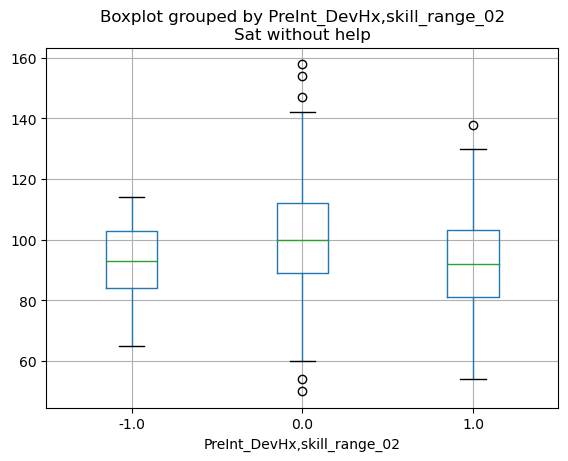

                             PreInt_DevHx,skill_range_03  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_03                     1.000000             -0.069247
WIAT,WIAT_Spell_Stnd                           -0.069247              1.000000


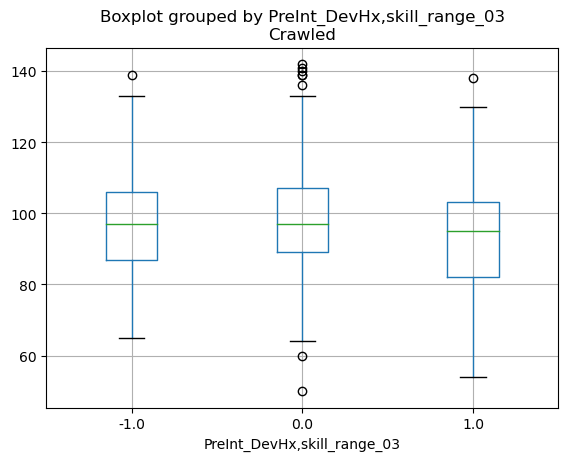

                             PreInt_DevHx,skill_range_04  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_04                     1.000000             -0.123003
WIAT,WIAT_Spell_Stnd                           -0.123003              1.000000


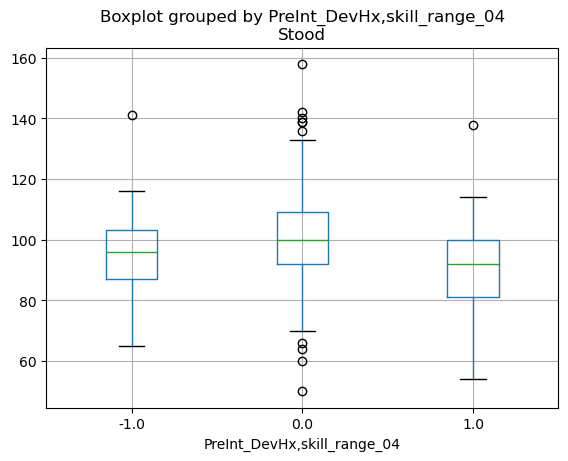

                             PreInt_DevHx,skill_range_05  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_05                     1.000000             -0.040506
WIAT,WIAT_Spell_Stnd                           -0.040506              1.000000


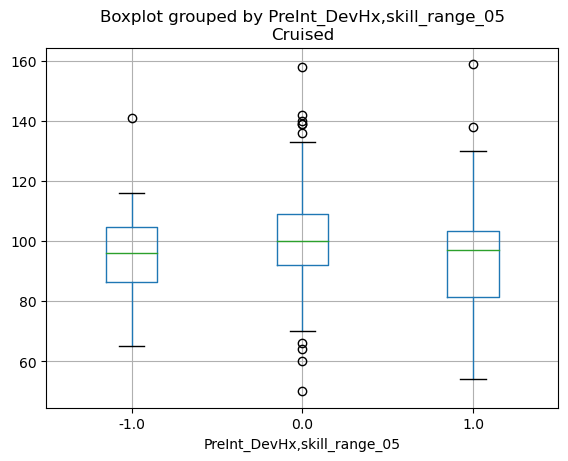

                             PreInt_DevHx,skill_range_06  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_06                     1.000000             -0.118499
WIAT,WIAT_Spell_Stnd                           -0.118499              1.000000


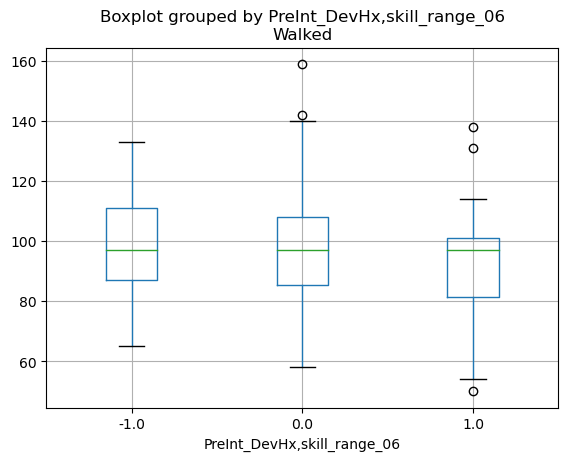

                             PreInt_DevHx,skill_range_07  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_07                     1.000000             -0.074305
WIAT,WIAT_Spell_Stnd                           -0.074305              1.000000


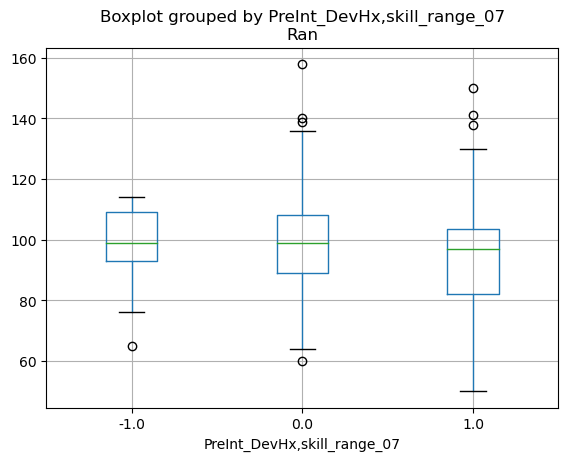

                             PreInt_DevHx,skill_range_08  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_08                     1.000000             -0.141376
WIAT,WIAT_Spell_Stnd                           -0.141376              1.000000


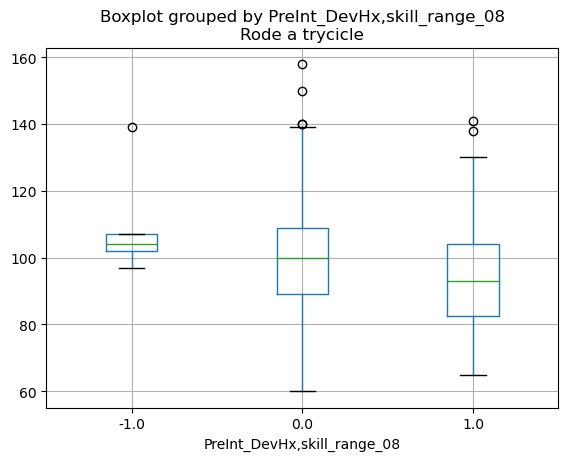

                             PreInt_DevHx,skill_range_09  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_09                     1.000000             -0.053347
WIAT,WIAT_Spell_Stnd                           -0.053347              1.000000


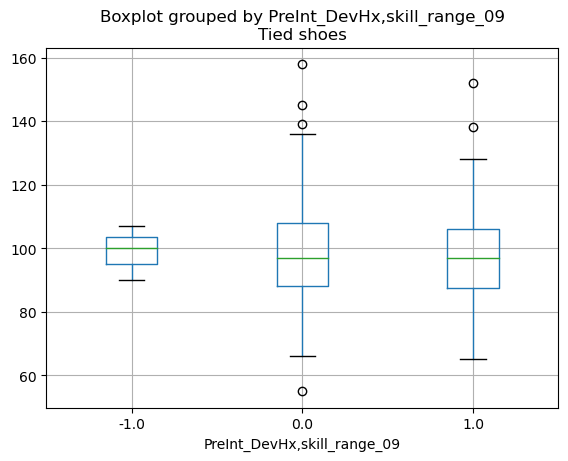

                             PreInt_DevHx,skill_range_10  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_10                     1.000000             -0.135574
WIAT,WIAT_Spell_Stnd                           -0.135574              1.000000


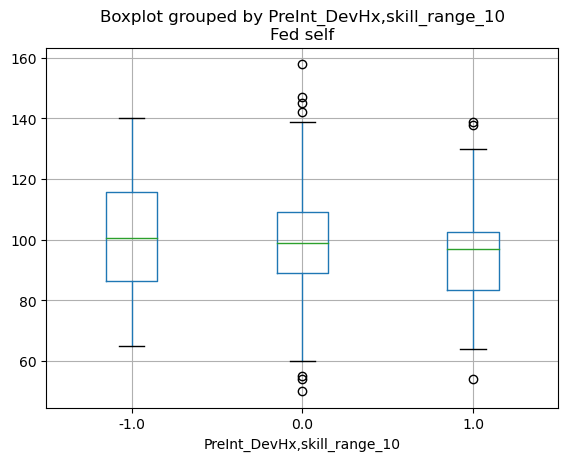

                             PreInt_DevHx,skill_range_11  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_11                     1.000000             -0.214744
WIAT,WIAT_Spell_Stnd                           -0.214744              1.000000


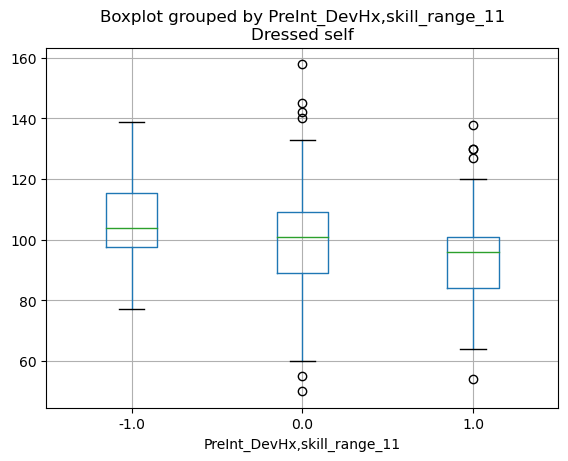

                             PreInt_DevHx,skill_range_15  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_15                     1.000000             -0.246855
WIAT,WIAT_Spell_Stnd                           -0.246855              1.000000


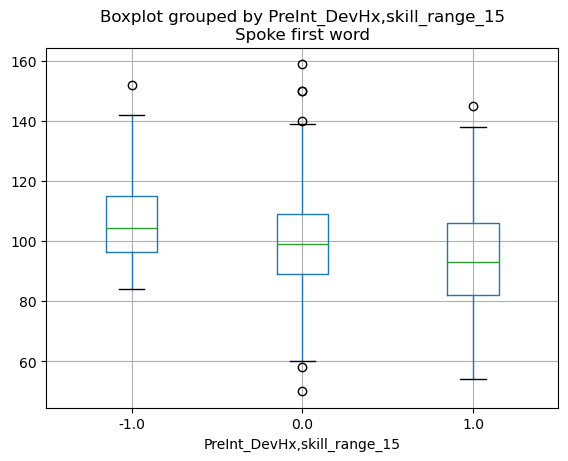

                             PreInt_DevHx,skill_range_16  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_16                     1.000000             -0.245527
WIAT,WIAT_Spell_Stnd                           -0.245527              1.000000


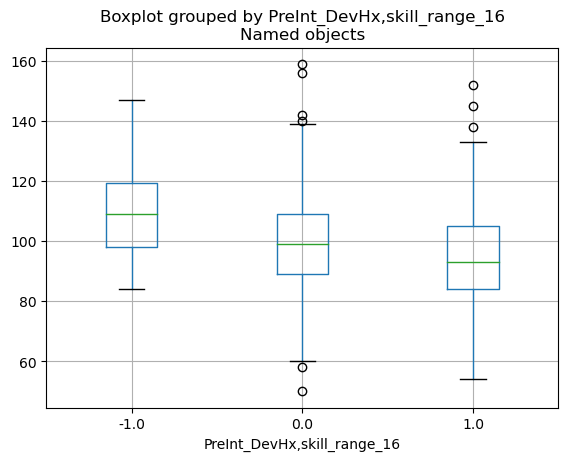

                             PreInt_DevHx,skill_range_17  WIAT,WIAT_Spell_Stnd
PreInt_DevHx,skill_range_17                     1.000000             -0.228909
WIAT,WIAT_Spell_Stnd                           -0.228909              1.000000


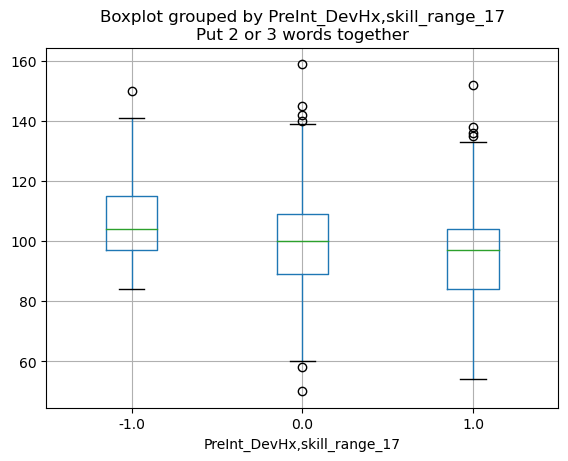

In [20]:
# Correlation and multiple regression

lang_cols = ["PreInt_Lang,Child_Lang1_Life",
                "PreInt_Lang,Child_Lang2_Life",
                "PreInt_Lang,Child_Lang3_Life"]    
five_and_six_wiat[lang_cols] = five_and_six_wiat[lang_cols].apply(pd.to_numeric)
five_and_six_wiat["PreInt_Lang,NumLangs"] = five_and_six_wiat[lang_cols].sum(axis=1)

for_corr = five_and_six_wiat[["PreInt_FamHx,f_learn",
                 "PreInt_EduHx,CPSE",
                 "PreInt_EduHx,EI",
                 "PreInt_DevHx,premature",
                 "PreInt_Lang,NumLangs",
                 spelling,
                ] + skill_range_cols]

# Transform PreInt_DevHx,skill_range_X cols into a number (Early or early=-1, Normal or normal=0, Late or late=1, other=NaN)
cols = [x for x in for_corr.columns if "PreInt_DevHx,skill_range_" in x]   
dict = {"Early": -1, "early": -1, "Normal": 0, "normal": 0, "Late": 1, "late": 1}  
for_corr = LORIS_data_preparation.replace_with_dict_otherwise_nan(for_corr, cols, dict)

for col in for_corr.columns:
    for_corr[col] = for_corr[col].astype(float)

for col in for_corr.columns:
    if col != spelling:
        df = for_corr[[col, spelling]].dropna()
        print(df.corr())
        if "age" in col:
            df.plot(col, spelling, kind="scatter", title=dict_range_cols[col] if col in dict_range_cols else col)
        else:
            df.boxplot(spelling, col)
            plt.title(dict_range_cols[col] if col in dict_range_cols else col)
            plt.show()
        plt.show()

In [43]:
# Sort skill_range_cols by number of NaNs, inversed
skill_range_cols = sorted(skill_range_cols, key=lambda x: len(five_and_six_wiat[five_and_six_wiat[x].notna()]), reverse=True)

for_lr = for_corr[["PreInt_EduHx,CPSE",
                   "PreInt_EduHx,EI",
                   "PreInt_DevHx,premature",
                   "PreInt_Lang,NumLangs",
                   spelling
                  ] + skill_range_cols[:5]]
for_lr = for_lr.dropna()
for_lr.shape
x_cols = [x for x in for_lr.columns if x != spelling]

from sklearn.model_selection import cross_validate, StratifiedKFold, train_test_split
from sklearn.linear_model import ElasticNet, Lasso
from sklearn.metrics import mean_absolute_error, r2_score

train, test = train_test_split(for_lr)
X_train, y_train = train[x_cols], train[spelling]
X_test, y_test = test[x_cols], test[spelling]
print(X_train.shape, y_train.shape)

en = ElasticNet()
cv = StratifiedKFold(5)
cv_results = cross_validate(en, X_train, y_train, cv=cv, return_estimator=True)
print("r2: ", cv_results['test_score'].mean(), cv_results['test_score'])

for model in cv_results['estimator']:
    coefs = pd.DataFrame(zip(model.coef_, x_cols), columns = ["Coefficient", "Item"]).sort_values("Coefficient", ascending=False)
    display(coefs)


(96, 9) (96,)
r2:  -0.007897690976500282 [ 7.38502660e-02 -1.14339392e-04  7.13468465e-02 -1.98430524e-01
  1.38592964e-02]


/Users/home/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


,Coefficient,Item
7,0.000000,"PreInt_DevHx,skill_range_10"
1,-0.130996,"PreInt_EduHx,EI"
5,-0.223499,"PreInt_DevHx,skill_range_16"
2,-0.255335,"PreInt_DevHx,premature"
3,-0.303906,"PreInt_Lang,NumLangs"
8,-0.781373,"PreInt_DevHx,skill_range_11"
4,-1.001884,"PreInt_DevHx,skill_range_17"
0,-2.209249,"PreInt_EduHx,CPSE"
6,-2.719758,"PreInt_DevHx,skill_range_15"


,Coefficient,Item
3,-0.000000,"PreInt_Lang,NumLangs"
7,0.000000,"PreInt_DevHx,skill_range_10"
1,-0.155863,"PreInt_EduHx,EI"
2,-0.642583,"PreInt_DevHx,premature"
5,-0.709968,"PreInt_DevHx,skill_range_16"
8,-1.126244,"PreInt_DevHx,skill_range_11"
4,-1.391762,"PreInt_DevHx,skill_range_17"
0,-1.855743,"PreInt_EduHx,CPSE"
6,-2.693789,"PreInt_DevHx,skill_range_15"


,Coefficient,Item
7,0.569965,"PreInt_DevHx,skill_range_10"
1,-0.000000,"PreInt_EduHx,EI"
2,-0.300248,"PreInt_DevHx,premature"
3,-0.590809,"PreInt_Lang,NumLangs"
4,-0.689743,"PreInt_DevHx,skill_range_17"
5,-0.719006,"PreInt_DevHx,skill_range_16"
8,-1.361158,"PreInt_DevHx,skill_range_11"
0,-1.856799,"PreInt_EduHx,CPSE"
6,-2.170668,"PreInt_DevHx,skill_range_15"


,Coefficient,Item
7,0.000000,"PreInt_DevHx,skill_range_10"
2,-0.110093,"PreInt_DevHx,premature"
5,-0.144787,"PreInt_DevHx,skill_range_16"
3,-0.194463,"PreInt_Lang,NumLangs"
1,-0.379671,"PreInt_EduHx,EI"
8,-1.161354,"PreInt_DevHx,skill_range_11"
4,-1.400446,"PreInt_DevHx,skill_range_17"
6,-2.103659,"PreInt_DevHx,skill_range_15"
0,-3.151235,"PreInt_EduHx,CPSE"


,Coefficient,Item
1,-0.000000,"PreInt_EduHx,EI"
5,-0.000000,"PreInt_DevHx,skill_range_16"
7,-0.000000,"PreInt_DevHx,skill_range_10"
2,-0.233463,"PreInt_DevHx,premature"
4,-0.886335,"PreInt_DevHx,skill_range_17"
8,-1.382057,"PreInt_DevHx,skill_range_11"
3,-1.492535,"PreInt_Lang,NumLangs"
6,-1.573869,"PreInt_DevHx,skill_range_15"
0,-1.578110,"PreInt_EduHx,CPSE"


In [ ]:
# Check for corr between each other
cols = [x for x in for_corr.columns if "age" in x]
for_self_corr = for_corr[cols].dropna()
display(for_self_corr.corr())

cols = [x for x in for_corr.columns if "range" in x]
for_self_corr = for_corr[cols].dropna()
display(for_self_corr.corr())

,"PreInt_DevHx,skill_age_15","PreInt_DevHx,skill_age_16","PreInt_DevHx,skill_age_17"
"PreInt_DevHx,skill_age_15",1.000000,0.613768,0.505055
"PreInt_DevHx,skill_age_16",0.613768,1.000000,0.790566
"PreInt_DevHx,skill_age_17",0.505055,0.790566,1.000000


,"PreInt_DevHx,skill_range_15","PreInt_DevHx,skill_range_16","PreInt_DevHx,skill_range_17"
"PreInt_DevHx,skill_range_15",1.000000,0.891071,0.810453
"PreInt_DevHx,skill_range_16",0.891071,1.000000,0.870903
"PreInt_DevHx,skill_range_17",0.810453,0.870903,1.000000


In [29]:
relevant_assessments_read = ["WISC", "PreInt_EduHx", "PreInt_DevHx", "PreInt_TxHx", "PreInt_Lang", "PreInt_FamHx", "PreInt_FamHx_RDC", 
                             "PreInt_Demos_Home", "PreInt_Demos_Fam", "NIH_Scores", "SympChck", "SCQ", "Barratt", 
        "ASSQ", "ARI_P", "SDQ", "SWAN", "SRS", "CBCL", "ICU_P", "ICU_SR", "PANAS", "APQ_P", "PCIAT", "DTS", "ESWAN", "MFQ_P", "APQ_SR", 
        "WHODAS_P", "CIS_P", "SAS", "PSI", "RBS", "PhenX_Neighborhood", "WHODAS_SR", "CIS_SR", "SCARED_P", "SCARED_SR", 
        "C3SR", "CCSC", "CPIC", "YSR", "PhenX_SchoolRisk", "CBCL_Pre", "SRS_Pre", "ASR"]
display(LORIS_data_preparation.get_cumul_df(five_and_six_wiat, relevant_assessments_read))

,Respondents,Assessments,Min Age,N of Assessments,Last Assessment
0,635,[PreInt_EduHx],5.0,1,PreInt_EduHx
1,634,"[PreInt_EduHx, PreInt_TxHx]",5.0,2,PreInt_TxHx
2,633,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx]",5.0,3,PreInt_DevHx
3,630,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,4,SympChck
4,627,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,5,NIH_Scores
5,626,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,6,SCQ
6,624,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,7,SDQ
7,619,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,8,Barratt
8,613,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,9,PreInt_Demos_Fam
9,613,"[PreInt_EduHx, PreInt_TxHx, PreInt_DevHx, Symp...",5.0,10,PreInt_Demos_Home
